# Упражнение 1

Found parameters: [ 3.99937229  0.24987539 -2.9836154   8.5066485 ]
      loss with train data: 7.758648265777381e-05
      loss with test data: 8.909164728359744e-05


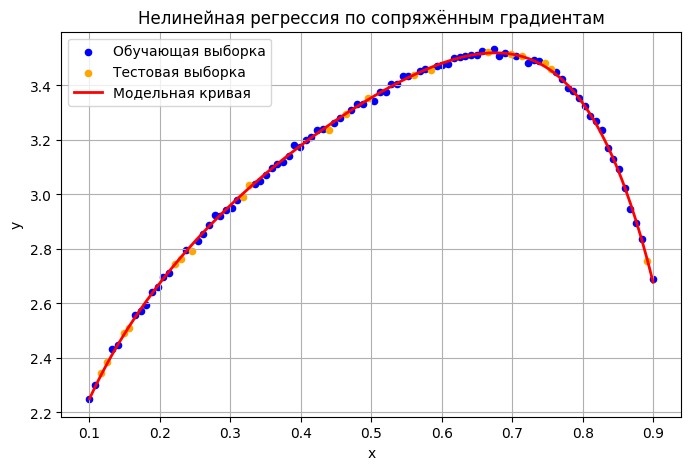

In [23]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
x_data = np.array([
    0.1,0.10808081,0.11616162,0.12424242,0.13232323,0.14040404,
    0.14848485,0.15656566,0.16464646,0.17272727,0.18080808,0.18888889,
    0.1969697,0.20505051,0.21313131,0.22121212,0.22929293,0.23737374,
    0.24545455,0.25353535,0.26161616,0.26969697,0.27777778,0.28585859,
    0.29393939,0.3020202,0.31010101,0.31818182,0.32626263,0.33434343,
    0.34242424,0.35050505,0.35858586,0.36666667,0.37474747,0.38282828,
    0.39090909,0.3989899,0.40707071,0.41515152,0.42323232,0.43131313,
    0.43939394,0.44747475,0.45555556,0.46363636,0.47171717,0.47979798,
    0.48787879,0.4959596,0.5040404,0.51212121,0.52020202,0.52828283,
    0.53636364,0.54444444,0.55252525,0.56060606,0.56868687,0.57676768,
    0.58484848,0.59292929,0.6010101,0.60909091,0.61717172,0.62525253,
    0.63333333,0.64141414,0.64949495,0.65757576,0.66565657,0.67373737,
    0.68181818,0.68989899,0.6979798,0.70606061,0.71414141,0.72222222,
    0.73030303,0.73838384,0.74646465,0.75454545,0.76262626,0.77070707,
    0.77878788,0.78686869,0.79494949,0.8030303,0.81111111,0.81919192,
    0.82727273,0.83535354,0.84343434,0.85151515,0.85959596,0.86767677,
    0.87575758,0.88383838,0.89191919,0.9
])
y_data = -np.array([
    -2.24812911, -2.30215341, -2.34463875, -2.38651064, -2.43190693, -2.44713884,
    -2.49003176, -2.51006098, -2.55831541, -2.57056931, -2.59340317, -2.64026441,
    -2.65975636, -2.69517476, -2.71046599, -2.74422696, -2.76251291, -2.79505506,
    -2.79301352, -2.82852207, -2.854651, -2.88654236, -2.92345136, -2.91943321,
    -2.94240833, -2.9487781, -2.97926813, -2.99198343, -3.03396292, -3.03814694,
    -3.04944858, -3.07196161, -3.09883706, -3.11338258, -3.11898122, -3.14254571,
    -3.18330957, -3.17453301, -3.20021237, -3.21213539, -3.23715191, -3.24017664,
    -3.23640684, -3.26147762, -3.28208909, -3.29453546, -3.31160478, -3.33188752,
    -3.33320305, -3.35238927, -3.34176317, -3.37471911, -3.37543159, -3.40452694,
    -3.40505804, -3.43358858, -3.43596139, -3.43705603, -3.45264647, -3.46029402,
    -3.45723979, -3.4720453, -3.47597438, -3.4795529, -3.50118552, -3.5031452,
    -3.5097196, -3.51083668, -3.51128397, -3.52708836, -3.5222885, -3.53317295,
    -3.50965143, -3.51939652, -3.51659198, -3.50734187, -3.50882329, -3.48129755,
    -3.49384658, -3.48813707, -3.48345018, -3.46180698, -3.44784696, -3.42372263,
    -3.39080674, -3.37867045, -3.35281766, -3.32575498, -3.28934964, -3.26814804,
    -3.23547615, -3.1707224, -3.12910072, -3.09300443, -3.02523152, -2.9453774,
    -2.89454317, -2.83662685, -2.75433056, -2.68946573
])

import numpy as np
from scipy.optimize import minimize

# Model function
# f(x) = w1 * x**w2 + w3 * x**w4
def model(x, params):
    w1, w2, w3, w4 = params
    return w1 * x**w2 + w3 * x**w4

# Loss: mean squared error
def loss(params, x, y):
    return np.mean((model(x, params) - y)**2)

# Wrapper to perform nonlinear regression with conjugate gradients
def fit_nonlinear_regression(x, y, initial_params=None):
    x = np.asarray(x)
    y = np.asarray(y)

        # Normalize y only (x stays positive because exponentiation requires x>0)
    y_mean, y_std = y.mean(), y.std()
    x_norm = x  # do NOT normalize x
    y_norm = y

    if initial_params is None:
        # Reasonable initialization
        initial_params = np.array([1.0, 1.0, 1.0, 1.0])

    # Optimize using conjugate gradient
    result = minimize(
        fun=lambda p: loss(p, x_norm, y_norm),
        x0=initial_params,
        method='CG',
        options={'maxiter': 1000, 'gtol': 1e-6}
    )

    # Denormalize the model's prediction function
    def predictor(x_new):
        x_new = (np.asarray(x_new))
        pred_norm = model(x_new, result.x)
        return pred_norm * y_std + y_mean
    
    return result.x, predictor, result

def train_test_split(x, y, test_ratio=0.2, seed=1568):
    rng = np.random.default_rng(seed)
    idx = rng.permutation(len(x))
    n_test = int(len(x) * test_ratio)
    test_idx = idx[:n_test]
    train_idx = idx[n_test:]
    return x[train_idx], y[train_idx], x[test_idx], y[test_idx]


x_data_train, y_data_train, x_data_test, y_data_test = train_test_split(x_data, y_data)

params, predictor, result = fit_nonlinear_regression(x_data_train, y_data_train, initial_params=np.array([1.0, 1.0, -1.0, 1.0]))
print(f"""Found parameters: {params}
      loss with train data: {loss(params, x_data_train, y_data_train)}
      loss with test data: {loss(params, x_data_test, y_data_test)}""")

plt.figure(figsize=(8,5))
plt.scatter(x_data_train, y_data_train, label="Обучающая выборка", color='blue', s=20)
plt.scatter(x_data_test, y_data_test, label="Тестовая выборка", color='orange', s=20)
x_line = np.linspace(x_data.min(), x_data.max(), 200)
plt.plot(x_line, model(x_line, params), label="Модельная кривая", color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Нелинейная регрессия по сопряжённым градиентам")
plt.grid(True)
plt.show()



In [24]:
# упражнение 2
def dichotomy(f, a, b, eps=1e-5, max_iter=1000):
    delta = eps / 2
    for _ in range(max_iter):
        if b - a < eps:
            break
        x1 = (a + b) / 2 - delta
        x2 = (a + b) / 2 + delta
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    return (a + b) / 2


def fibonacci_minimize(f, a, b, eps=1e-5, max_iter=1000):
    # строим ряд Фибоначчи
    F = [1, 1]
    while F[-1] < (b - a) / eps:
        F.append(F[-1] + F[-2])

    n = len(F) - 1
    k = 0

    x1 = a + F[n-2] / F[n] * (b - a)
    x2 = a + F[n-1] / F[n] * (b - a)
    f1, f2 = f(x1), f(x2)

    for _ in range(max_iter):
        if k >= n - 2:
            break
        k += 1
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + F[n-k-1] / F[n-k] * (b - a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + F[n-k-2] / F[n-k] * (b - a)
            f1 = f(x1)

    return (x1 + x2) / 2




In [25]:
test_function_1 = lambda t : (t-5) * np.exp(t)
test_function_2 = lambda t : (t*2-3)/(t+2)
test_function_3 = lambda t : t**4 - 2*t**2 
x_1_1 = dichotomy(test_function_1, 0, 10)
print("Дихотомия для функции 1:", x_1_1)
x_2_1 = dichotomy(test_function_2, 0, 10)
print("Дихотомия для функции 2:", x_2_1)
x_3_1 = dichotomy(test_function_3, 0, 10)
print("Дихотомия для функции 3:", x_3_1)

x_1_2 = fibonacci_minimize(test_function_1, 0, 10)
print("Фибоначчи для функции 1:", x_1_2)
x_2_2 = fibonacci_minimize(test_function_2, 0, 10)
print("Фибоначчи для функции 2:", x_2_2)
x_3_2 = fibonacci_minimize(test_function_3, 0, 10)
print("Фибоначчи для функции 3:", x_3_2)

Дихотомия для функции 1: 3.999999999997863
Дихотомия для функции 2: 5.000000000000001e-06
Дихотомия для функции 3: 0.9999999999863225
Фибоначчи для функции 1: 4.000002971174409
Фибоначчи для функции 2: 7.4279360217014565e-06
Фибоначчи для функции 3: 1.0000007427936022


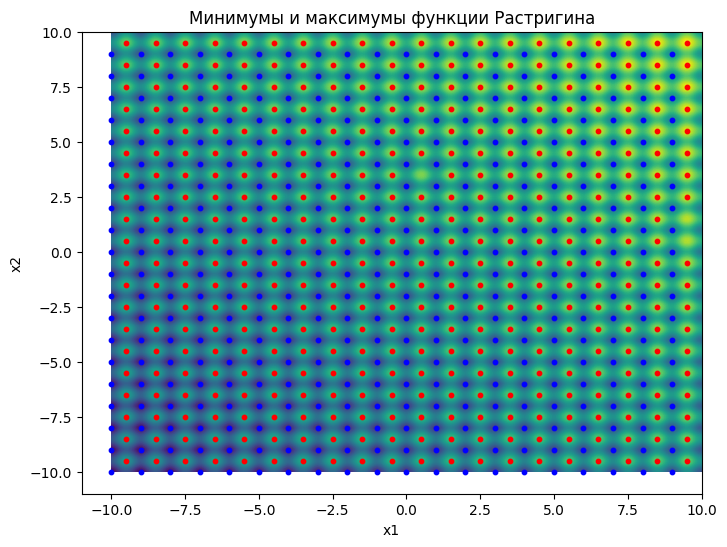

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

# Функция Растригина
f = lambda x1, x2 : 20 + x1 + x2 - 10*np.cos(2 * np.pi * x1) - 10*np.cos(2 * np.pi * x2)
f_vec = lambda v: f(v[0], v[1])

x_max = 10
maxs = []
mins = []

for x1_init in range(-x_max, x_max):
    for x2_init in range(-x_max, x_max):
        x0 = np.array([x1_init, x2_init], dtype=float)

        try:
            # минимизация
            res_min = spo.minimize(f_vec, x0, method='BFGS', options={'maxiter': 500})
            if res_min.success:
                mins.append((res_min.fun, res_min.x))

            # максимизация: минимизируем -f
            res_max = spo.minimize(lambda v: -f_vec(v), 
                                   x0, method='BFGS', options={'maxiter': 500})
            if res_max.success:
                maxs.append((-res_max.fun, res_max.x))

        except Exception:
            pass

def unique_points(points, tol=1e-3):
    seen = set()
    unique = []
    for fun_val, x in points:
        key = (round(x[0] / tol), round(x[1] / tol))
        if key not in seen:
            seen.add(key)
            unique.append((fun_val, x))
    return unique

mins = unique_points(mins, tol=1e-3)
maxs = unique_points(maxs, tol=1e-3)


# Сетка для визуализации
x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=100, cmap='viridis')

# наносим минимумы (синие)
for fun_val, point in mins:
    plt.scatter(point[0], point[1], color='blue', s=10)

# наносим максимумы (красные)
for fun_val, point in maxs:
    plt.scatter(point[0], point[1], color='red', s=10)

plt.title("Минимумы и максимумы функции Растригина")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# упражнение 4
На левом всегда двигаемся перпендикулярно после спуска -> наискорейший спуск
На втором сопряжнные градиенты

# упражнение 5
Будем делать градиентный спуск для оврага, не играясь с метрикой. Но если мы все же посмотрим на этот спуск с точки зрения другой метрики оврага, то получится, что мы двигаемся по не очено перпендикулярным направлениям, и в целом мы пытаемся найти направление на минимум каждый раз раскладываясь по матрице с большим числом обусловленности. 

Ну типа мы хотим двигаться по направлению (0,1), но можем двигаться по векторам (1,0) и (200,1). Очень больно и не оптимально